# Project 4: Regression Analysis and Define Your Own Task!

##### Group Member
Yifu Yuan, 804973353  
Zhiquan You, 205667859  
Wenxuan Wu, 705846929

### Question 1. Standardize feature columns and prepare them for training.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm

In [2]:
def cross_validation(model, X, y, n_splits=10):
    kf = KFold(n_splits=n_splits)
    train_rmse, test_rmse = 0, 0
    for train, test in kf.split(X):
        train_data, train_target = X.loc[train], y.loc[train]
        test_data, test_target = X.loc[test], y.loc[test]
        model.fit(train_data, train_target)
        train_pred, test_pred = model.predict(train_data), model.predict(test_data)
        train_rmse += metrics.mean_squared_error(train_target, train_pred) ** 0.5
        test_rmse += metrics.mean_squared_error(test_target, test_pred) ** 0.5
    return train_rmse/n_splits, test_rmse/n_splits

In [3]:
diamond_df = pd.read_csv('diamonds.csv')
gt_2011 = pd.read_csv('gt_2011.csv')
gt_2012 = pd.read_csv('gt_2012.csv')
gt_2013 = pd.read_csv('gt_2013.csv')
gt_2014 = pd.read_csv('gt_2014.csv')
gt_2015 = pd.read_csv('gt_2015.csv')

In [4]:
all_files = ['gt_2011.csv','gt_2012.csv', 'gt_2013.csv','gt_2014.csv', 'gt_2015.csv']
arr = []
for filename in all_files:
    year = filename.split("_")[1].split('.')[0]
    df = pd.read_csv(filename, index_col=None, header=0)
    row, col = df.shape
    year_col = [year] * row
    df['Year'] = year_col
    arr.append(df)

gt_df = pd.concat(arr, axis=0, ignore_index=True)
gt_df.drop(columns=["NOX"], inplace=True)
gt_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,Year
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,2011
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,2011
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,2011
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,2011
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,2011
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,2015
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,2015
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,2015
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,2015


In [5]:
diamond_df = diamond_df.iloc[:, 1:]
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2758,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2759,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2760,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
cut_to_num = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
color_to_num = {'J':0, 'I':1,'H':2, 'G':3, 'F':4, 'E':4, 'D':5}
clarity_to_num = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2':3, 'VS1': 4, 'VVS2': 5, 'VVS1':6, 'IF':7}

diamond_df['cut'].replace(cut_to_num, inplace=True)
diamond_df['color'].replace(color_to_num, inplace=True)
diamond_df['clarity'].replace(clarity_to_num, inplace=True)

diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,4,1,61.5,55.0,330,3.95,3.98,2.43
1,0.21,3,4,2,59.8,61.0,327,3.89,3.84,2.31
2,0.23,1,4,4,56.9,65.0,328,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,337,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,338,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,5,2,60.8,57.0,2758,5.75,5.76,3.50
53936,0.72,1,5,2,63.1,55.0,2759,5.69,5.75,3.61
53937,0.70,2,5,2,62.8,60.0,2760,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
diamond_numerical = ['carat', 'depth', 'table', 'x', 'y', 'z']
diamond_categorical = ['cut', 'color', 'clarity']
diamond_std = StandardScaler().fit_transform(diamond_df.values)
diamond_std_df = pd.DataFrame(diamond_std, index=diamond_df.index, columns=diamond_df.columns)
diamond_std_df
#diamond_df[diamond_numerical] = StandardScaler().fit_transform(diamond_df[diamond_numerical])
#diamond_std_df = diamond_df
#diamond_std_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198168,0.981473,0.658175,-1.245215,-0.174092,-1.099672,-0.903594,-1.587837,-1.536196,-1.571129
1,-1.240361,0.085889,0.658175,-0.638095,-1.360738,1.585529,-0.904346,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.705279,0.658175,0.576145,-3.385019,3.375663,-0.904095,-1.498691,-1.457395,-1.741175
3,-1.071587,0.085889,-1.532267,-0.030975,0.454133,0.242928,-0.901839,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.705279,-2.262415,-1.245215,1.082358,0.242928,-0.901588,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,0.981473,1.388322,-0.638095,-0.662711,-0.204605,-0.294982,0.016798,0.022304,-0.054888
53936,-0.164427,-1.705279,1.388322,-0.638095,0.942753,-1.099672,-0.294731,-0.036690,0.013548,0.100988
53937,-0.206621,-0.809695,1.388322,-0.638095,0.733344,1.137995,-0.294480,-0.063434,-0.047741,0.030135
53938,0.130927,0.085889,-0.802120,-1.245215,-0.523105,0.242928,-0.295232,0.373383,0.337506,0.285204


In [8]:
gt_numerical = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']
gt_categorical = ['Year']
gt_std = StandardScaler().fit_transform(gt_df.values)
gt_std_df = pd.DataFrame(gt_std, index=gt_df.index, columns=gt_df.columns)
gt_std_df
#gt_df[gt_numerical] = StandardScaler().fit_transform(gt_df[gt_numerical])
#gt_std_df = gt_df
#gt_std_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,Year
0,-1.762362,0.871052,0.401627,-0.451875,-0.377702,0.272119,0.536589,0.074502,-0.149273,-0.904182,-1.399443
1,-1.801920,0.809164,0.440351,-0.458207,-0.384376,0.266417,0.568742,0.074502,-0.154783,-0.850611,-1.399443
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015,-0.849020,-1.399443
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774,-0.946415,-1.399443
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251,-0.930328,-1.399443
...,...,...,...,...,...,...,...,...,...,...,...
36728,-1.891401,2.387315,1.060287,-0.981255,-1.543602,-2.533516,-0.667691,-1.563948,-1.515021,3.809943,1.419550
36729,-1.818812,2.402787,1.118097,-0.947401,-1.560524,-2.499301,-0.566847,-1.582516,-1.576558,3.876679,1.419550
36730,-1.642292,2.387315,1.199903,-0.791702,-1.598418,-2.476491,-0.391466,-1.645262,-1.468179,3.996008,1.419550
36731,-1.588354,2.418260,1.129438,0.074403,-0.476847,-0.258214,0.577511,-0.134226,-0.265917,0.415856,1.419550


### Question 2. Plot a heatmap of the Pearson correlation matrix of the dataset columns. Report which features have the highest absolute correlation with the target variable. In the context of each dataset, describe what this high correlation suggests.

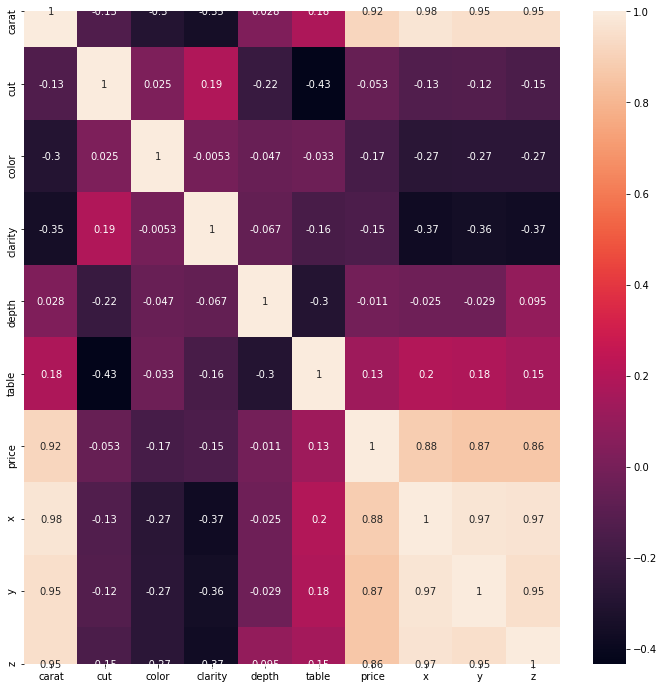

In [9]:
plt.figure(figsize = (12, 12))
diamond_heatmap = sns.heatmap(diamond_std_df.corr(method = "pearson"), annot = True)
plt.show()

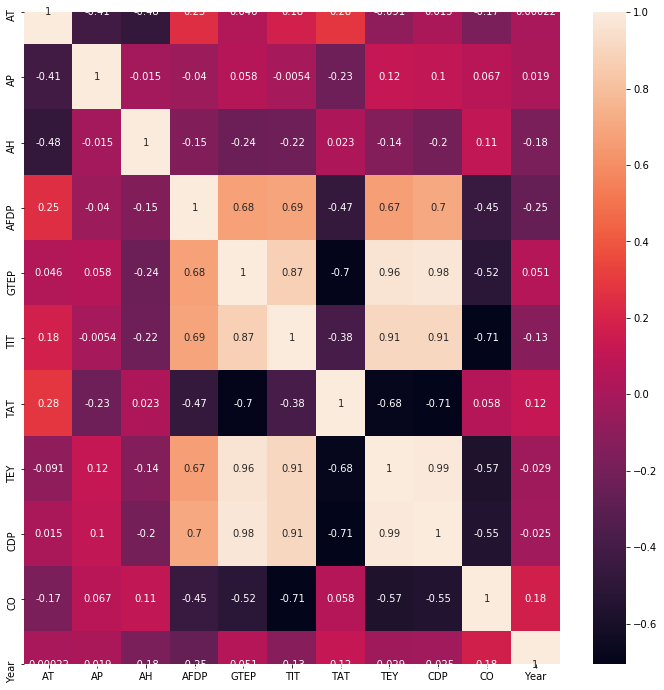

In [10]:
plt.figure(figsize = (12, 12))
gt_heatmap = sns.heatmap(gt_std_df.corr(method = "pearson"), annot = True)
plt.show()

1. For diamond, the highest absolute correlation is feature carat. This makes sense because generally speaking greater the carat, the more expensive is the diamond.
2. For emission, the highest absolute correlation is TIT. As CO and TIT as of negative correlation, the greater TIT is, the smaller CO emission is.

### Question 3. Plot the histogram of numerical features. What preprocessing can be done if the distribution of a feature has high skewness?

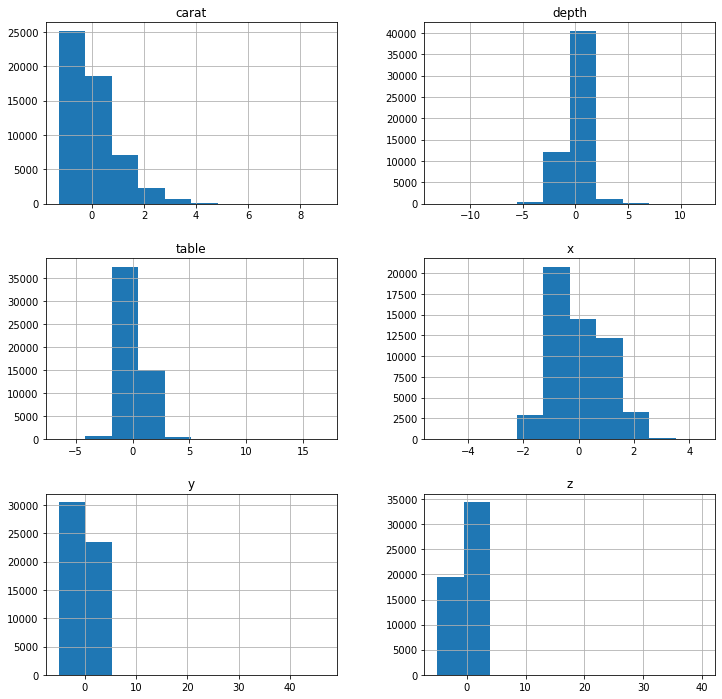

In [11]:
#diamond_feature = diamond_std_df.columns.values.tolist()
_ = diamond_std_df.hist(column = diamond_numerical, figsize = (12, 12))

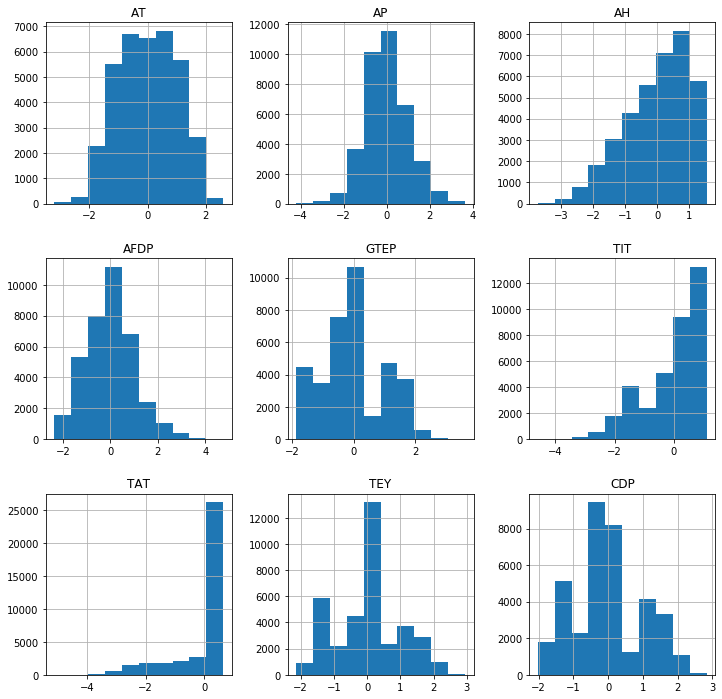

In [12]:
#gt_feature = gt_std_df.columns.values.tolist()[:-2]
_ = gt_std_df.hist(column = gt_numerical, figsize = (12, 12))

If a feature F is highly skewed, we can try to down sample data points whose F falls in the skewed region. Namely, decrease the number of samples that has a skewed value of feature F.

### Question 4. Construct and inspect the box plot of categorical features vs target variable. What do you find?

c:\users\yivyu\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


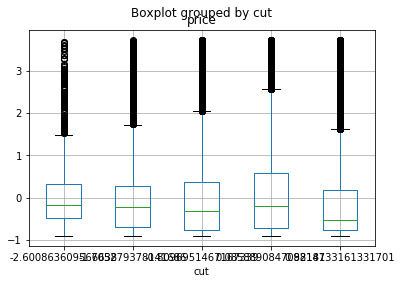

c:\users\yivyu\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


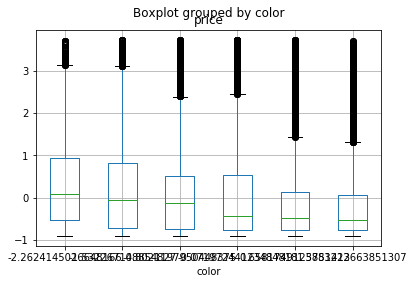

c:\users\yivyu\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


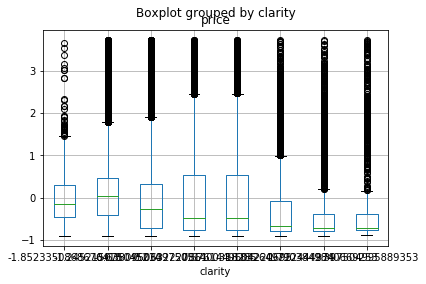

In [13]:
#dimond_feature = dimond_std_df.columns.values.tolist()
#dimond_feature.pop(0)
#dimond_feature.remove('price')

for feature in diamond_categorical:
    diamond_std_df.boxplot(column='price', by=feature)
    plt.show()

#diamond_feature

c:\users\yivyu\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


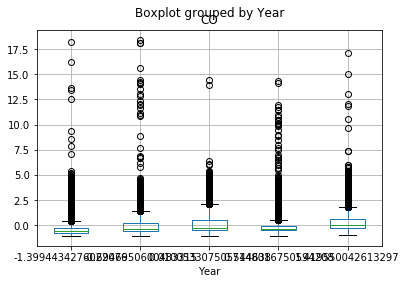

In [14]:
#gt_feature = gt_std_df.columns.values.tolist()
#gt_feature.remove('NOX')

for feature in gt_categorical:
    gt_std_df.boxplot(column='CO', by=feature)
    plt.show()



### Question 5. For the Diamonds dataset, plot the counts by color, cut and clarity.

In [15]:
def plot_bar(x, y, xlabel, ylabel, title):
  plt.bar(x, y)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.title(title)

  plt.show()

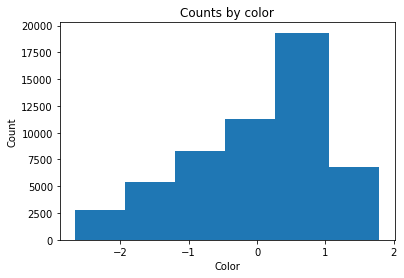

In [16]:
color = diamond_std_df['color']
color_count = Counter(color)
plot_bar(color_count.keys(), color_count.values(), 'Color', 'Count', 'Counts by color')

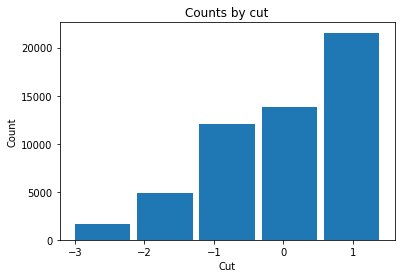

In [17]:
cut = diamond_std_df['cut']
cut_count = Counter(cut)
plot_bar(cut_count.keys(), cut_count.values(), 'Cut', 'Count', 'Counts by cut')

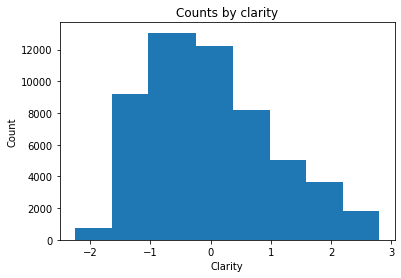

In [18]:
clarity = diamond_std_df['clarity']
clarity_count = Counter(clarity)
plot_bar(clarity_count.keys(), clarity_count.values(), 'Clarity', 'Count', 'Counts by clarity')

### Question 6. For the Gas Emission dataset, plot the yearly trends for each feature and compare them. The data points don’t have timestamps but you may assume the indeces are times.

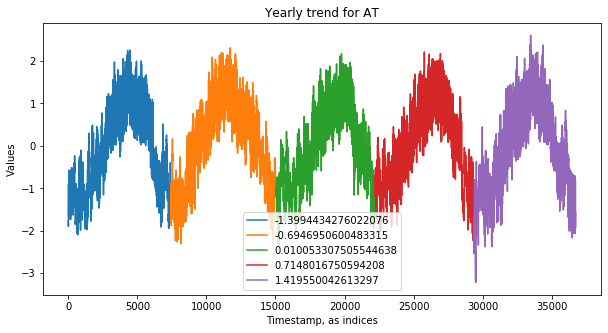

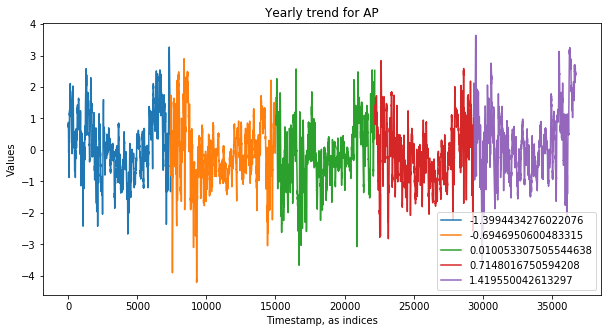

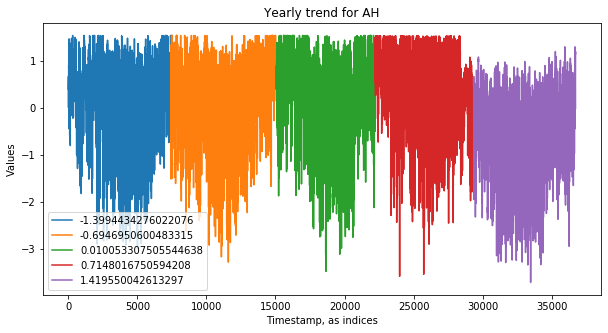

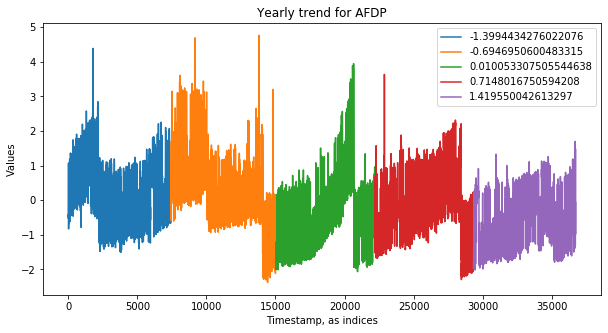

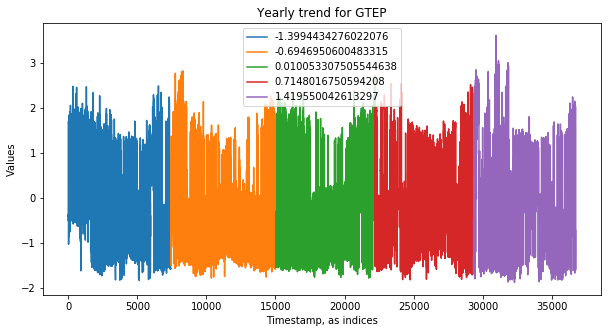

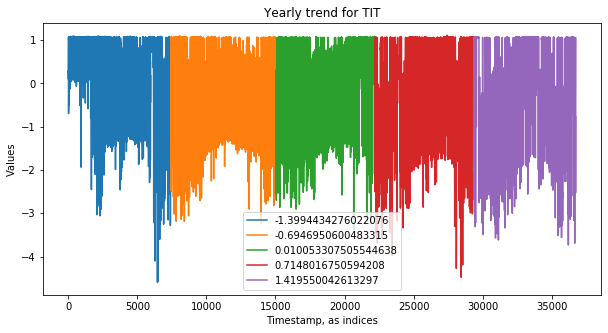

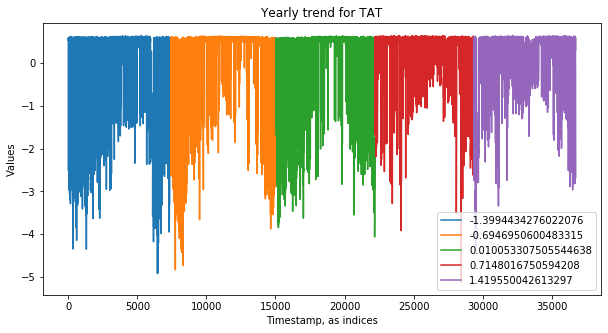

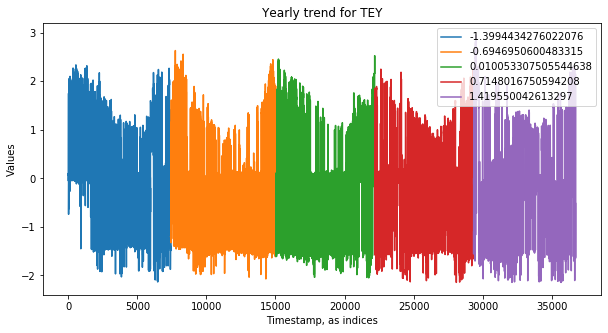

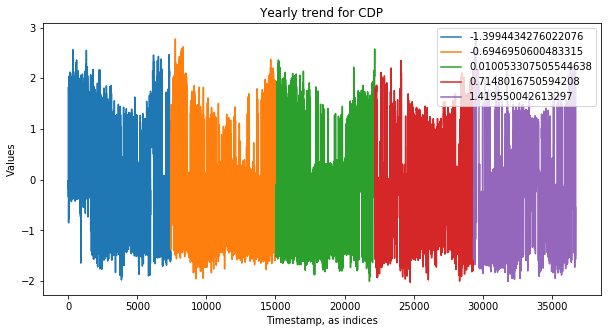

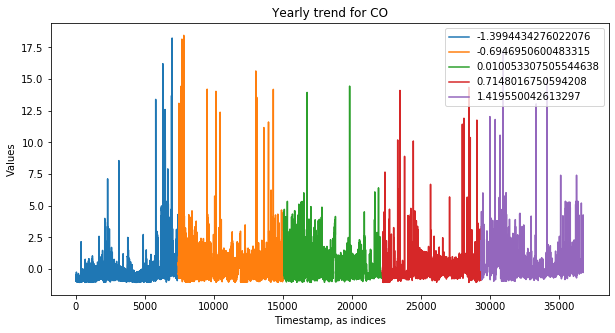

In [19]:
gt_feature = gt_std_df.columns.values.tolist()
gt_feature.remove('Year')

for feature in gt_feature:
  fig, ax = plt.subplots(1,1, figsize=(10, 5))
  gt = gt_std_df.groupby(by=['Year'])[feature].plot(ax=ax,legend=True)
  ax.set_xlabel("Timestamp, as indices")
  ax.set_ylabel("Values")
  ax.set_title('Yearly trend for ' + feature)
  # for key, val in gt:
  #   plt.xlabel('TimeStamp (as indices)')
  #   plt.ylabel('Value')
  #   plt.title('Yearly trend for ' + feature)
  #   plt.plot(val.index, val, label=key)
  #   plt.legend()
  #   plt.show()

### Question 7: Select most important features

In [20]:
diamond_mi = mutual_info_regression(diamond_std_df.loc[:, diamond_std_df.columns!='price'], diamond_std_df['price'])
print(diamond_mi)

[1.65169359 0.05748899 0.11627508 0.2179626  0.03099212 0.0362559
 1.41244916 1.42296169 1.36097982]


In [21]:
gt_mi = mutual_info_regression(gt_std_df.loc[:, gt_std_df.columns!='CO'], gt_std_df['CO'])
print(gt_mi)

[0.10490616 0.04132616 0.02548241 0.2787285  0.44556565 0.53921377
 0.16131085 0.49513889 0.47398837 0.12381823]


1. From the printed mutial info above, for diamond we will select carat, x, y and z, for gas emission we will select GTEP, TIT, TEY and CDP as the most import features. 
2. Feature selection generally speaking avoids overfitting by eliminating redundant data and improves accuracy as a result of less misleading data. Therefore, RMSE will be decreased after correct feature selection.

### Question 8: Explain how each regularization scheme affects the learned hypotheses

L1 regularization will force some less important weights to 0 and thus achieve the goal of feature elimination. L2 regularization on the other hand does not easily give up any feature but instead drive weights closer to 0 on each dimension. If one wants to "cut out" some features in learnt coefficients, one might use L1 regularization as it zeroes out some features. If one wants to have simple/smaller model/coefficients, then he can use L2 regularization as this regularization tend to make coefficients shrink in the direction of their respective axis.

### Question 9: Report your choice of the best regularization scheme along with the optimal penalty sorted(sklearn.metrics.SCORERS.keys())parameter and briefly explain how it can be computed.

In [22]:
linear_regression = LinearRegression(n_jobs=-1)
print(cross_validation(linear_regression, diamond_std_df[['carat', 'x', 'y', 'z']], diamond_std_df['price']))
print(cross_validation(linear_regression, diamond_df.drop(columns=['price'], inplace=False), diamond_df['price']))

(0.3791444488323997, 0.352186984958747)
(1197.5464672334797, 1198.9522608294358)


In [23]:
alpha_list = [10**i for i in range(-5, 6)]
best_rmse, best_alpha = float('inf'), 0
for a in alpha_list:
    lasso = Lasso(alpha=a)
    train_rmse, test_rmse = cross_validation(linear_regression, diamond_std_df[['carat', 'x', 'y', 'z']], diamond_std_df['price'])
    if test_rmse < best_rmse:
        best_rmse = test_rmse
        best_alpha = a
print("For Lasso Regression, the smallest rmse is {:.4f} obtained by alpha {}".format(best_rmse, best_alpha))

For Lasso Regression, the smallest rmse is 0.3522 obtained by alpha 1e-05


In [24]:
best_rmse, best_alpha = float('inf'), 0
for a in alpha_list:
    ridge = Ridge(alpha=a)
    train_rmse, test_rmse = cross_validation(ridge, diamond_std_df[['carat', 'x', 'y', 'z']], diamond_std_df['price'])
    if test_rmse < best_rmse:
        best_rmse = test_rmse
        best_alpha = a
print("For Ridge Regression, the smallest rmse is {:.4f} obtained by alpha {}".format(best_rmse, best_alpha))

For Ridge Regression, the smallest rmse is 0.3522 obtained by alpha 1e-05


### Question 10: Does feature scaling play any role (in the cases with and without regularization)?

Prevent overfitting?

### Question 11: What is the meaning of p-values and how can you infer the most significant features?

The p-value for each term tests the null hypothesis that the coefficient is equal to zero. A low p-value indicates we can reject the null-hypothesis, i.e., a low p value means that this feature is significant while a large p value indicates the feature is possibly irrelavent.

### Question 12: Look up for the most salient features and interpret them. 

In [25]:
pass

### Question 13: What degree of polynomial is best? What does a very high-order polynomial imply about the fit on the training data? How do you choose this parameter?

In [ ]:
degree = list(range(5, 10))
best_rmse, best_d = float('inf'), 0
for d in tqdm(degree):
    polyreg = make_pipeline(PolynomialFeatures(d), LinearRegression())
    train_rmse, test_rmse = cross_validation(polyreg, diamond_df.drop(columns=['price'], inplace=False), diamond_std_df['price'])
    if test_rmse < best_rmse:
        best_rmse = test_rmse
        best_d = d
print("For Polynomial Regression, the smallest rmse is {:.4f} obtained by degree {}".format(best_rmse, best_d))

 40%|█████████████████████████████████▏                                                 | 2/5 [15:05<25:33, 511.29s/it]

High-order polynomial implies that the model is probably overfitting. To choose the degree parameter, we need to focus on the test rmse to actually see the generalization power of the model. We iterate the degree parameter from 5 to 14 to choose the best one with lowest rmse.

### Question 14: Craft new feature and check if it boosts accuracy

In [ ]:
new_feature = [diamond_std_df['x'][i] * diamond_std_df['y'][i] * diamond_std_df['z'][i] for i in range(diamond_std_df.shape[0])]
new_feature = StandardScaler().fit_transform(np.array(new_feature).reshape(-1, 1))
diamond_std_df['new_feature'] = new_feature

In [ ]:
polyreg = make_pipeline(PolynomialFeatures(best_d), LinearRegression())
train_rmse, test_rmse = cross_validation(polyreg, diamond_std_df[['carat', 'new_feature']], diamond_std_df['price'])

### Question 15: Why does neural network do much better than linear regression?

Neural network is able to deal with non-linearities while linear regression depends on certain linear dependency between features and target. If there is indeed non-linearities in the dataset, then neural network is expected to be better than linear regression.

### Question 16: Adjust your network size and weight decay as regularization. Find a good hyper-parameter set systematically

In [ ]:
lr_list = [0.001, 0.01, 0.1]
first_layer = [128, 256, 512]
second_layer = [128, 256, 512]
third_layer = [128, 256, 512]
best_setting = None
best_rmse = float('inf')
for lr in lr_list:
    for fl in first_layer:
        for sl in second_layer:
            for tl in third_layer:
                mlp = MLPClassifier(learning_rate_init=lr, hidden_layer_sizes=(fl, sl, tl), learning_rate="invscaling", max_iter=300)
                train_rmse, test_rmse = cross_validation(mlp, diamond_std_df.drop(columns=['price']), diamond_std_df['price'])
                if test_rmse < best_rmse:
                    best_rmse = test_rmse
                    best_setting = (lr, fl, sl, tl)
print(best_setting)


### Question 17: What activation function should be used for the output?

We can use relu activation function to keep the continuity and linearility of the output while adding non-linearility to the model to grant it more generalization power.

### Question 18: What is the risk of increasing the depth of the network too far?

It will overfit the data and thus reults in poor validation performance while slowing down the training process.